# BFSI Credit Score Case Study

### Abhishek Pawar
### Samrudhi Yeginwar
### Pratik Chide

In [1]:
%config Completer.use_jedi = False
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
df = pd.read_csv('train.csv')

In [592]:
df.head()

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12            1824.843333                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   
3      19114.12                    NaN                  3  ...        Good   
4      19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No           49.574949       80.41529543900253   
1                     No           49.574949      118.28022162236736   
2                     No           49.574949         81.699521264648   
3                     No           49.574949       199.4580743910713   
4                     No           49.574949      41.420153086217326   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
1    Low_spent_Large_value_payments  284.62916249607184         Good  
2   Low_spent_Medium_value_payments   331.2098628537912         Good  
3    Low_spent_Small_value_payments  223.45130972736786         Good  
4  High_spent_Medium_value_payments  341.48923103222177         Good  

[5 rows x 28 columns]

# Data Cleaning

Dropping following column: 'Name', 'SNN', 'ID' and 'Customer_ID'
Reason: These columns have many duplicate values, repeating over the range. It might add bias in the model without any inforation gain

In [593]:
df.drop(['ID','Customer_ID','Name','SSN','Month'], axis=1, inplace=True)

In [594]:
df.head()

Age Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0    23  Scientist      19114.12            1824.843333                  3   
1    23  Scientist      19114.12                    NaN                  3   
2  -500  Scientist      19114.12                    NaN                  3   
3    23  Scientist      19114.12                    NaN                  3   
4    23  Scientist      19114.12            1824.843333                  3   

   Num_Credit_Card  Interest_Rate Num_of_Loan  \
0                4              3           4   
1                4              3           4   
2                4              3           4   
3                4              3           4   
4                4              3           4   

                                        Type_of_Loan  Delay_from_due_date  \
0  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
1  Auto Loan, Credit-Builder Loan, Personal Loan,...                   -1   
2  Auto Loan, Credit-Builder Loan, Personal Loan,...                    3   
3  Auto Loan, Credit-Builder Loan, Personal Loan,...                    5   
4  Auto Loan, Credit-Builder Loan, Personal Loan,...                    6   

   ... Credit_Mix Outstanding_Debt  Credit_Utilization_Ratio  \
0  ...          _           809.98                 26.822620   
1  ...       Good           809.98                 31.944960   
2  ...       Good           809.98                 28.609352   
3  ...       Good           809.98                 31.377862   
4  ...       Good           809.98                 24.797347   

      Credit_History_Age Payment_of_Min_Amount  Total_EMI_per_month  \
0  22 Years and 1 Months                    No            49.574949   
1                    NaN                    No            49.574949   
2  22 Years and 3 Months                    No            49.574949   
3  22 Years and 4 Months                    No            49.574949   
4  22 Years and 5 Months                    No            49.574949   

  Amount_invested_monthly                 Payment_Behaviour  \
0       80.41529543900253   High_spent_Small_value_payments   
1      118.28022162236736    Low_spent_Large_value_payments   
2         81.699521264648   Low_spent_Medium_value_payments   
3       199.4580743910713    Low_spent_Small_value_payments   
4      41.420153086217326  High_spent_Medium_value_payments   

      Monthly_Balance Credit_Score  
0  312.49408867943663         Good  
1  284.62916249607184         Good  
2   331.2098628537912         Good  
3  223.45130972736786         Good  
4  341.48923103222177         Good  

[5 rows x 23 columns]

Checking for Null values

In [595]:
df.isna().sum()

Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

Monthly_Inhand_Salary - need to drop NaN values becuase. Prefered not use mean/median for this field to replce NaN values                         beacuse it may give very skewed value.

Type_of_loan - Dropping NaN value. can't not use an estimate for the loan type

Next step, dropping all the NaN values.

In [596]:
df.drop('Type_of_Loan', axis=1, inplace=True)

In [597]:
df.dropna(inplace=True)

In [598]:
df.isnull().sum()

Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [599]:
df.head()

Age Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0    23  Scientist      19114.12            1824.843333                  3   
6    23  Scientist      19114.12            1824.843333                  3   
8   28_    _______      34847.84            3037.986667                  2   
9    28    Teacher      34847.84            3037.986667                  2   
10   28    Teacher     34847.84_            3037.986667                  2   

    Num_Credit_Card  Interest_Rate Num_of_Loan  Delay_from_due_date  \
0                 4              3           4                    3   
6                 4              3           4                    3   
8                 4              6           1                    3   
9                 4              6           1                    7   
10             1385              6           1                    3   

   Num_of_Delayed_Payment  ... Credit_Mix  Outstanding_Debt  \
0                       7  ...          _            809.98   
6                      8_  ...       Good            809.98   
8                       4  ...       Good            605.03   
9                       1  ...       Good            605.03   
10                     -1  ...          _            605.03   

   Credit_Utilization_Ratio     Credit_History_Age  Payment_of_Min_Amount  \
0                 26.822620  22 Years and 1 Months                     No   
6                 22.537593  22 Years and 7 Months                     No   
8                 24.464031  26 Years and 7 Months                     No   
9                 38.550848  26 Years and 8 Months                     No   
10                33.224951  26 Years and 9 Months                     No   

   Total_EMI_per_month Amount_invested_monthly  \
0            49.574949       80.41529543900253   
6            49.574949       178.3440674122349   
8            18.816215        104.291825168246   
9            18.816215       40.39123782853101   
10           18.816215       58.51597569589465   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
6    Low_spent_Small_value_payments   244.5653167062043         Good  
8    Low_spent_Small_value_payments  470.69062692529184     Standard  
9   High_spent_Large_value_payments   484.5912142650067         Good  
10  High_spent_Large_value_payments  466.46647639764313     Standard  

[5 rows x 22 columns]

Cleaning Age data. Removing underscore marks.

In [600]:
df['Age'] = df['Age'].apply(lambda x: x[0:len(x)-1] if x[-1]=='_' else x)

In [601]:
df.head()

Age Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23  Scientist      19114.12            1824.843333                  3   
6   23  Scientist      19114.12            1824.843333                  3   
8   28    _______      34847.84            3037.986667                  2   
9   28    Teacher      34847.84            3037.986667                  2   
10  28    Teacher     34847.84_            3037.986667                  2   

    Num_Credit_Card  Interest_Rate Num_of_Loan  Delay_from_due_date  \
0                 4              3           4                    3   
6                 4              3           4                    3   
8                 4              6           1                    3   
9                 4              6           1                    7   
10             1385              6           1                    3   

   Num_of_Delayed_Payment  ... Credit_Mix  Outstanding_Debt  \
0                       7  ...          _            809.98   
6                      8_  ...       Good            809.98   
8                       4  ...       Good            605.03   
9                       1  ...       Good            605.03   
10                     -1  ...          _            605.03   

   Credit_Utilization_Ratio     Credit_History_Age  Payment_of_Min_Amount  \
0                 26.822620  22 Years and 1 Months                     No   
6                 22.537593  22 Years and 7 Months                     No   
8                 24.464031  26 Years and 7 Months                     No   
9                 38.550848  26 Years and 8 Months                     No   
10                33.224951  26 Years and 9 Months                     No   

   Total_EMI_per_month Amount_invested_monthly  \
0            49.574949       80.41529543900253   
6            49.574949       178.3440674122349   
8            18.816215        104.291825168246   
9            18.816215       40.39123782853101   
10           18.816215       58.51597569589465   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
6    Low_spent_Small_value_payments   244.5653167062043         Good  
8    Low_spent_Small_value_payments  470.69062692529184     Standard  
9   High_spent_Large_value_payments   484.5912142650067         Good  
10  High_spent_Large_value_payments  466.46647639764313     Standard  

[5 rows x 22 columns]

Cleaning Annual_Income date. Removing underscore marks.

In [602]:
df['Annual_Income'].apply(lambda x: x[0:len(x)-1] if x[-1]=='_' else x)

0        19114.12
6        19114.12
8        34847.84
9        34847.84
10       34847.84
           ...   
99994    39628.99
99995    39628.99
99996    39628.99
99997    39628.99
99999    39628.99
Name: Annual_Income, Length: 66548, dtype: object

In [603]:
df['Annual_Income'] = df['Annual_Income'].apply(lambda x: x[0:len(x)-1] if x[-1]=='_' else x)

Assigninng unknown occupation in Occupation column. Later, this column will be encoded.

In [604]:
df['Occupation'].value_counts()

_______          4707
Lawyer           4401
Mechanic         4222
Engineer         4183
Architect        4164
Accountant       4158
Media_Manager    4150
Teacher          4149
Developer        4143
Doctor           4126
Scientist        4119
Entrepreneur     4098
Journalist       4056
Musician         3978
Manager          3965
Writer           3929
Name: Occupation, dtype: int64

In [605]:
df['Occupation'] = df['Occupation'].replace(['_______'], 'Unknown')

In [606]:
df['Occupation'].value_counts()

Unknown          4707
Lawyer           4401
Mechanic         4222
Engineer         4183
Architect        4164
Accountant       4158
Media_Manager    4150
Teacher          4149
Developer        4143
Doctor           4126
Scientist        4119
Entrepreneur     4098
Journalist       4056
Musician         3978
Manager          3965
Writer           3929
Name: Occupation, dtype: int64

In [607]:
df.head()

Age Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23  Scientist      19114.12            1824.843333                  3   
6   23  Scientist      19114.12            1824.843333                  3   
8   28    Unknown      34847.84            3037.986667                  2   
9   28    Teacher      34847.84            3037.986667                  2   
10  28    Teacher      34847.84            3037.986667                  2   

    Num_Credit_Card  Interest_Rate Num_of_Loan  Delay_from_due_date  \
0                 4              3           4                    3   
6                 4              3           4                    3   
8                 4              6           1                    3   
9                 4              6           1                    7   
10             1385              6           1                    3   

   Num_of_Delayed_Payment  ... Credit_Mix  Outstanding_Debt  \
0                       7  ...          _            809.98   
6                      8_  ...       Good            809.98   
8                       4  ...       Good            605.03   
9                       1  ...       Good            605.03   
10                     -1  ...          _            605.03   

   Credit_Utilization_Ratio     Credit_History_Age  Payment_of_Min_Amount  \
0                 26.822620  22 Years and 1 Months                     No   
6                 22.537593  22 Years and 7 Months                     No   
8                 24.464031  26 Years and 7 Months                     No   
9                 38.550848  26 Years and 8 Months                     No   
10                33.224951  26 Years and 9 Months                     No   

   Total_EMI_per_month Amount_invested_monthly  \
0            49.574949       80.41529543900253   
6            49.574949       178.3440674122349   
8            18.816215        104.291825168246   
9            18.816215       40.39123782853101   
10           18.816215       58.51597569589465   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
6    Low_spent_Small_value_payments   244.5653167062043         Good  
8    Low_spent_Small_value_payments  470.69062692529184     Standard  
9   High_spent_Large_value_payments   484.5912142650067         Good  
10  High_spent_Large_value_payments  466.46647639764313     Standard  

[5 rows x 22 columns]

Cleaning Age data again for negative values.

In [608]:
print('Negative values in the Age column: ',sum(df.Age.astype(int)<0))

Negative values in the Age column:  604


In [609]:
df['Age'] = df['Age'].astype(int)
df['Age'] = df[df['Age']>0]

In [610]:
print('Negative values in the Age column: ',sum(df.Age<0))

Negative values in the Age column:  0


Cleaning Num_of_Loan. Removing underscore marks and negative values.

In [611]:
df['Num_of_Loan'] = df['Num_of_Loan'].apply(lambda x: x[0:len(x)-1] if x[-1]=='_' else x)

In [612]:
df['Num_of_Loan'] = df['Num_of_Loan'].astype(int)
df['Num_of_Loan'] = df[df['Num_of_Loan']>=0]

In [613]:
df.head()

Age Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23  Scientist      19114.12            1824.843333                  3   
6   23  Scientist      19114.12            1824.843333                  3   
8   28    Unknown      34847.84            3037.986667                  2   
9   28    Teacher      34847.84            3037.986667                  2   
10  28    Teacher      34847.84            3037.986667                  2   

    Num_Credit_Card  Interest_Rate Num_of_Loan  Delay_from_due_date  \
0                 4              3          23                    3   
6                 4              3          23                    3   
8                 4              6          28                    3   
9                 4              6          28                    7   
10             1385              6          28                    3   

   Num_of_Delayed_Payment  ... Credit_Mix  Outstanding_Debt  \
0                       7  ...          _            809.98   
6                      8_  ...       Good            809.98   
8                       4  ...       Good            605.03   
9                       1  ...       Good            605.03   
10                     -1  ...          _            605.03   

   Credit_Utilization_Ratio     Credit_History_Age  Payment_of_Min_Amount  \
0                 26.822620  22 Years and 1 Months                     No   
6                 22.537593  22 Years and 7 Months                     No   
8                 24.464031  26 Years and 7 Months                     No   
9                 38.550848  26 Years and 8 Months                     No   
10                33.224951  26 Years and 9 Months                     No   

   Total_EMI_per_month Amount_invested_monthly  \
0            49.574949       80.41529543900253   
6            49.574949       178.3440674122349   
8            18.816215        104.291825168246   
9            18.816215       40.39123782853101   
10           18.816215       58.51597569589465   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
6    Low_spent_Small_value_payments   244.5653167062043         Good  
8    Low_spent_Small_value_payments  470.69062692529184     Standard  
9   High_spent_Large_value_payments   484.5912142650067         Good  
10  High_spent_Large_value_payments  466.46647639764313     Standard  

[5 rows x 22 columns]

Cleaning Num_of_Delayed_Payment and Outstanding_Dept

In [614]:
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].apply(lambda x: x[0:len(x)-1] if x[-1]=='_' else x)

In [615]:
df['Outstanding_Debt'] = df['Outstanding_Debt'].apply(lambda x: x[0:len(x)-1] if x[-1]=='_' else x)

In [616]:
df['Credit_History_Age']

0         22 Years and 1 Months
6         22 Years and 7 Months
8         26 Years and 7 Months
9         26 Years and 8 Months
10        26 Years and 9 Months
                  ...          
99994     31 Years and 5 Months
99995     31 Years and 6 Months
99996     31 Years and 7 Months
99997     31 Years and 8 Months
99999    31 Years and 10 Months
Name: Credit_History_Age, Length: 66548, dtype: object

Dropping Credit_History_Age column due to the format of data.

In [617]:
df.drop('Credit_History_Age', axis=1, inplace=True)

In [618]:
df.head(10)

Age Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23  Scientist      19114.12            1824.843333                  3   
6   23  Scientist      19114.12            1824.843333                  3   
8   28    Unknown      34847.84            3037.986667                  2   
9   28    Teacher      34847.84            3037.986667                  2   
10  28    Teacher      34847.84            3037.986667                  2   
12  28    Teacher      34847.84            3037.986667                  2   
13  28    Teacher      34847.84            3037.986667                  2   
15  28    Teacher      34847.84            3037.986667                  2   
16  34    Unknown     143162.64           12187.220000                  1   
17  34   Engineer     143162.64           12187.220000                  1   

    Num_Credit_Card  Interest_Rate Num_of_Loan  Delay_from_due_date  \
0                 4              3          23                    3   
6                 4              3          23                    3   
8                 4              6          28                    3   
9                 4              6          28                    7   
10             1385              6          28                    3   
12                4              6          28                    3   
13                4              6          28                    3   
15                4              6          28                    3   
16                5              8          34                    5   
17                5              8          34                   13   

   Num_of_Delayed_Payment  ... Num_Credit_Inquiries  Credit_Mix  \
0                       7  ...                  4.0           _   
6                       8  ...                  4.0        Good   
8                       4  ...                  2.0        Good   
9                       1  ...                  2.0        Good   
10                     -1  ...                  2.0           _   
12                      1  ...                  2.0        Good   
13                      0  ...                  2.0        Good   
15                      4  ...                  2.0        Good   
16                      8  ...                  3.0        Good   
17                      6  ...                  3.0        Good   

   Outstanding_Debt Credit_Utilization_Ratio  Payment_of_Min_Amount  \
0            809.98                26.822620                     No   
6            809.98                22.537593                     No   
8            605.03                24.464031                     No   
9            605.03                38.550848                     No   
10           605.03                33.224951                     No   
12           605.03                34.977895                     No   
13           605.03                33.381010                     No   
15           605.03                32.933856                     No   
16          1303.01                28.616735                     No   
17          1303.01                41.702573                     No   

   Total_EMI_per_month  Amount_invested_monthly  \
0            49.574949        80.41529543900253   
6            49.574949        178.3440674122349   
8            18.816215         104.291825168246   
9            18.816215        40.39123782853101   
10           18.816215        58.51597569589465   
12           18.816215       130.11542024292334   
13           18.816215       43.477190144355745   
15           18.816215       218.90434353388733   
16          246.992319         168.413702679309   
17          246.992319       232.86038375993544   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
6    Low_spent_Small_value_payments   244.5653167062043         Good  
8    Low_spent_Small_value_payments  470.69062692529184     Standard  
9   Hig

Cleaning Amount_invested_monthly column.

In [619]:
sum(df['Amount_invested_monthly']=='__10000__')

3001

In [620]:
df['Amount_invested_monthly'] = df[df['Amount_invested_monthly']!='__10000__']

In [621]:
sum(df['Amount_invested_monthly']=='__10000__')

0

In [622]:
df['Payment_Behaviour']

0         High_spent_Small_value_payments
6          Low_spent_Small_value_payments
8          Low_spent_Small_value_payments
9         High_spent_Large_value_payments
10        High_spent_Large_value_payments
                       ...               
99994    High_spent_Medium_value_payments
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
99999                              !@9#%8
Name: Payment_Behaviour, Length: 66548, dtype: object

Cleaning Payment_Behaviour column.

In [623]:
sum(df['Payment_Behaviour']=='!@9#%8')

4968

In [624]:
df.drop(df[df['Payment_Behaviour'] =='!@9#%8'].index, inplace = True)

In [625]:
sum(df['Payment_Behaviour']=='!@9#%8')

0

In [626]:
df['Payment_Behaviour']

0         High_spent_Small_value_payments
6          Low_spent_Small_value_payments
8          Low_spent_Small_value_payments
9         High_spent_Large_value_payments
10        High_spent_Large_value_payments
                       ...               
99991     High_spent_Large_value_payments
99994    High_spent_Medium_value_payments
99995     High_spent_Large_value_payments
99996    High_spent_Medium_value_payments
99997     High_spent_Large_value_payments
Name: Payment_Behaviour, Length: 61580, dtype: object

Cleaning Payment_of_Min_Amount.

In [627]:
sum(df['Payment_of_Min_Amount']=='NM')

7349

In [628]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].replace(['NM'], 'No')

In [629]:
sum(df['Payment_of_Min_Amount']=='NM')

0

In [630]:
df.head()

Age Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23  Scientist      19114.12            1824.843333                  3   
6   23  Scientist      19114.12            1824.843333                  3   
8   28    Unknown      34847.84            3037.986667                  2   
9   28    Teacher      34847.84            3037.986667                  2   
10  28    Teacher      34847.84            3037.986667                  2   

    Num_Credit_Card  Interest_Rate Num_of_Loan  Delay_from_due_date  \
0                 4              3          23                    3   
6                 4              3          23                    3   
8                 4              6          28                    3   
9                 4              6          28                    7   
10             1385              6          28                    3   

   Num_of_Delayed_Payment  ... Num_Credit_Inquiries  Credit_Mix  \
0                       7  ...                  4.0           _   
6                       8  ...                  4.0        Good   
8                       4  ...                  2.0        Good   
9                       1  ...                  2.0        Good   
10                     -1  ...                  2.0           _   

   Outstanding_Debt Credit_Utilization_Ratio  Payment_of_Min_Amount  \
0            809.98                26.822620                     No   
6            809.98                22.537593                     No   
8            605.03                24.464031                     No   
9            605.03                38.550848                     No   
10           605.03                33.224951                     No   

   Total_EMI_per_month  Amount_invested_monthly  \
0            49.574949                       23   
6            49.574949                       23   
8            18.816215                       28   
9            18.816215                       28   
10           18.816215                       28   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
6    Low_spent_Small_value_payments   244.5653167062043         Good  
8    Low_spent_Small_value_payments  470.69062692529184     Standard  
9   High_spent_Large_value_payments   484.5912142650067         Good  
10  High_spent_Large_value_payments  466.46647639764313     Standard  

[5 rows x 21 columns]

In [631]:
df.drop(df[df['Changed_Credit_Limit'] =='_'].index, inplace = True)

In [632]:
df.drop(df[df['Monthly_Balance'] =='__-333333333333333333333333333__'].index, inplace = True)

In [633]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60274 entries, 0 to 99997
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       59734 non-null  object 
 1   Occupation                60274 non-null  object 
 2   Annual_Income             60274 non-null  object 
 3   Monthly_Inhand_Salary     60274 non-null  float64
 4   Num_Bank_Accounts         60274 non-null  int64  
 5   Num_Credit_Card           60274 non-null  int64  
 6   Interest_Rate             60274 non-null  int64  
 7   Num_of_Loan               57432 non-null  object 
 8   Delay_from_due_date       60274 non-null  int64  
 9   Num_of_Delayed_Payment    60274 non-null  object 
 10  Changed_Credit_Limit      60274 non-null  object 
 11  Num_Credit_Inquiries      60274 non-null  float64
 12  Credit_Mix                60274 non-null  object 
 13  Outstanding_Debt          60274 non-null  object 
 14  Credit

In [634]:
sum(df['Credit_Mix']=='_')

12210

Dropping Credit_Mix because of _ values. Count is too high, 13492.

In [635]:
df.drop('Credit_Mix', axis=1, inplace=True)

In [636]:
df.head()

Age Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23  Scientist      19114.12            1824.843333                  3   
6   23  Scientist      19114.12            1824.843333                  3   
8   28    Unknown      34847.84            3037.986667                  2   
9   28    Teacher      34847.84            3037.986667                  2   
10  28    Teacher      34847.84            3037.986667                  2   

    Num_Credit_Card  Interest_Rate Num_of_Loan  Delay_from_due_date  \
0                 4              3          23                    3   
6                 4              3          23                    3   
8                 4              6          28                    3   
9                 4              6          28                    7   
10             1385              6          28                    3   

   Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                       7                11.27                   4.0   
6                       8                11.27                   4.0   
8                       4                 5.42                   2.0   
9                       1                 7.42                   2.0   
10                     -1                 5.42                   2.0   

   Outstanding_Debt  Credit_Utilization_Ratio Payment_of_Min_Amount  \
0            809.98                 26.822620                    No   
6            809.98                 22.537593                    No   
8            605.03                 24.464031                    No   
9            605.03                 38.550848                    No   
10           605.03                 33.224951                    No   

    Total_EMI_per_month Amount_invested_monthly  \
0             49.574949                      23   
6             49.574949                      23   
8             18.816215                      28   
9             18.816215                      28   
10            18.816215                      28   

                  Payment_Behaviour     Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663         Good  
6    Low_spent_Small_value_payments   244.5653167062043         Good  
8    Low_spent_Small_value_payments  470.69062692529184     Standard  
9   High_spent_Large_value_payments   484.5912142650067         Good  
10  High_spent_Large_value_payments  466.46647639764313     Standard

# Label Encoding 
Encoding the target labels in the Credit_Score

In [637]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [638]:
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])

In [639]:
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'Good': 0, 'Poor': 1, 'Standard': 2}


In [640]:
df.head()

Age Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23  Scientist      19114.12            1824.843333                  3   
6   23  Scientist      19114.12            1824.843333                  3   
8   28    Unknown      34847.84            3037.986667                  2   
9   28    Teacher      34847.84            3037.986667                  2   
10  28    Teacher      34847.84            3037.986667                  2   

    Num_Credit_Card  Interest_Rate Num_of_Loan  Delay_from_due_date  \
0                 4              3          23                    3   
6                 4              3          23                    3   
8                 4              6          28                    3   
9                 4              6          28                    7   
10             1385              6          28                    3   

   Num_of_Delayed_Payment Changed_Credit_Limit  Num_Credit_Inquiries  \
0                       7                11.27                   4.0   
6                       8                11.27                   4.0   
8                       4                 5.42                   2.0   
9                       1                 7.42                   2.0   
10                     -1                 5.42                   2.0   

   Outstanding_Debt  Credit_Utilization_Ratio Payment_of_Min_Amount  \
0            809.98                 26.822620                    No   
6            809.98                 22.537593                    No   
8            605.03                 24.464031                    No   
9            605.03                 38.550848                    No   
10           605.03                 33.224951                    No   

    Total_EMI_per_month Amount_invested_monthly  \
0             49.574949                      23   
6             49.574949                      23   
8             18.816215                      28   
9             18.816215                      28   
10            18.816215                      28   

                  Payment_Behaviour     Monthly_Balance  Credit_Score  
0   High_spent_Small_value_payments  312.49408867943663             0  
6    Low_spent_Small_value_payments   244.5653167062043             0  
8    Low_spent_Small_value_payments  470.69062692529184             2  
9   High_spent_Large_value_payments   484.5912142650067             0  
10  High_spent_Large_value_payments  466.46647639764313             2

#### Label encoding Occupation and Payment_of_Min_Amount

In [641]:
le_occupation = preprocessing.LabelEncoder()
le_payment_of_min_amount = preprocessing.LabelEncoder()

In [642]:
df['Occupation'] = le_occupation.fit_transform(df['Occupation'])
df['Payment_of_Min_Amount'] = le_payment_of_min_amount.fit_transform(df['Payment_of_Min_Amount'])

In [643]:
le_occupation_name_mapping = dict(zip(le_occupation.classes_, le_occupation.transform(le_occupation.classes_)))
print('Occupation encodings:\n',le_occupation_name_mapping)

Occupation encodings:
 {'Accountant': 0, 'Architect': 1, 'Developer': 2, 'Doctor': 3, 'Engineer': 4, 'Entrepreneur': 5, 'Journalist': 6, 'Lawyer': 7, 'Manager': 8, 'Mechanic': 9, 'Media_Manager': 10, 'Musician': 11, 'Scientist': 12, 'Teacher': 13, 'Unknown': 14, 'Writer': 15}


In [644]:
le_payment_of_min_amount_name_mapping = dict(zip(le_payment_of_min_amount.classes_, le_payment_of_min_amount.transform(le_payment_of_min_amount.classes_)))
print('Payment of minimum amount encodings:\n',le_payment_of_min_amount_name_mapping)

Payment of minimum amount encodings:
 {'No': 0, 'Yes': 1}


In [645]:
df.isna().sum()

Age                          540
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                 2842
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly     3230
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
dtype: int64

In [646]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Num_of_Loan'] = df['Num_of_Loan'].fillna(df['Num_of_Loan'].median())
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].fillna(df['Payment_of_Min_Amount'].median())
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].median())


In [647]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60274 entries, 0 to 99997
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       60274 non-null  float64
 1   Occupation                60274 non-null  int32  
 2   Annual_Income             60274 non-null  object 
 3   Monthly_Inhand_Salary     60274 non-null  float64
 4   Num_Bank_Accounts         60274 non-null  int64  
 5   Num_Credit_Card           60274 non-null  int64  
 6   Interest_Rate             60274 non-null  int64  
 7   Num_of_Loan               60274 non-null  float64
 8   Delay_from_due_date       60274 non-null  int64  
 9   Num_of_Delayed_Payment    60274 non-null  object 
 10  Changed_Credit_Limit      60274 non-null  object 
 11  Num_Credit_Inquiries      60274 non-null  float64
 12  Outstanding_Debt          60274 non-null  object 
 13  Credit_Utilization_Ratio  60274 non-null  float64
 14  Paymen

In [648]:
df[['Annual_Income',
    'Num_of_Delayed_Payment',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Monthly_Balance']]=df[['Annual_Income',
                            'Num_of_Delayed_Payment',
                            'Num_of_Delayed_Payment',
                            'Changed_Credit_Limit',
                            'Outstanding_Debt',
                            'Monthly_Balance']].astype(float)

In [649]:
df

Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      23.0          12       19114.12            1824.843333   
6      23.0          12       19114.12            1824.843333   
8      28.0          14       34847.84            3037.986667   
9      28.0          13       34847.84            3037.986667   
10     28.0          13       34847.84            3037.986667   
...     ...         ...            ...                    ...   
99991  29.0           1       20002.88            1929.906667   
99994  25.0           9       39628.99            3359.415833   
99995  25.0           9       39628.99            3359.415833   
99996  25.0           9       39628.99            3359.415833   
99997  25.0           9       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                      3                4              3         23.0   
6                      3                4              3         23.0   
8                      2                4              6         28.0   
9                      2                4              6         28.0   
10                     2             1385              6         28.0   
...                  ...              ...            ...          ...   
99991                 10                8             29         29.0   
99994                  4                6              7         25.0   
99995                  4                6              7         25.0   
99996                  4                6              7         25.0   
99997                  4                6           5729         25.0   

       Delay_from_due_date  Num_of_Delayed_Payment  Changed_Credit_Limit  \
0                        3                     7.0                 11.27   
6                        3                     8.0                 11.27   
8                        3                     4.0                  5.42   
9                        7                     1.0                  7.42   
10                       3                    -1.0                  5.42   
...                    ...                     ...                   ...   
99991                   33                    25.0                 18.31   
99994                   20                     6.0                  9.50   
99995                   23                     7.0                 11.50   
99996                   18                     7.0                 11.50   
99997                   27                     6.0                 11.50   

       Num_Credit_Inquiries  Outstanding_Debt  Credit_Utilization_Ratio  \
0                       4.0            809.98                 26.822620   
6                       4.0            809.98                 22.537593   
8                       2.0            605.03                 24.464031   
9                       2.0            605.03                 38.550848   
10                      2.0            605.03                 33.224951   
...                     ...               ...                       ...   
99991                   9.0           3571.70                 37.140784   
99994                   3.0            502.38                 39.323569   
99995                   3.0            502.38                 34.663572   
99996                   3.0            502.38                 40.565631   
99997                   3.0            502.38                 41.255522   

       Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                          0            49.574949                     23.0   
6                          0            49.574949                     23.0   
8                          0            18.816215                     28.0   
9                          0            18.816215                     28.0   
10                         0            18.816215                     28.0   
...                      ...                  ...                   

# One hot encoding

One-hot encoding for Payment_Behaviour column

In [650]:
df = pd.get_dummies(df, columns=['Payment_Behaviour'])

In [651]:
df.head()

Age  Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0   23.0          12       19114.12            1824.843333                  3   
6   23.0          12       19114.12            1824.843333                  3   
8   28.0          14       34847.84            3037.986667                  2   
9   28.0          13       34847.84            3037.986667                  2   
10  28.0          13       34847.84            3037.986667                  2   

    Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                 4              3         23.0                    3   
6                 4              3         23.0                    3   
8                 4              6         28.0                    3   
9                 4              6         28.0                    7   
10             1385              6         28.0                    3   

    Num_of_Delayed_Payment  ...  Total_EMI_per_month  Amount_invested_monthly  \
0                      7.0  ...            49.574949                     23.0   
6                      8.0  ...            49.574949                     23.0   
8                      4.0  ...            18.816215                     28.0   
9                      1.0  ...            18.816215                     28.0   
10                    -1.0  ...            18.816215                     28.0   

    Monthly_Balance  Credit_Score  \
0        312.494089             0   
6        244.565317             0   
8        470.690627             2   
9        484.591214             0   
10       466.466476             2   

    Payment_Behaviour_High_spent_Large_value_payments  \
0                                                   0   
6                                                   0   
8                                                   0   
9                                                   1   
10                                                  1   

    Payment_Behaviour_High_spent_Medium_value_payments  \
0                                                   0    
6                                                   0    
8                                                   0    
9                                                   0    
10                                                  0    

    Payment_Behaviour_High_spent_Small_value_payments  \
0                                                   1   
6                                                   0   
8                                                   0   
9                                                   0   
10                                                  0   

    Payment_Behaviour_Low_spent_Large_value_payments  \
0                                                  0   
6                                                  0   
8                                                  0   
9                                                  0   
10                                                 0   

    Payment_Behaviour_Low_spent_Medium_value_payments  \
0                                                   0   
6                                                   0   
8                                                   0   
9                                                   0   
10                                                  0   

    Payment_Behaviour_Low_spent_Small_value_payments  
0                                                  0  
6                                                  1  
8                                                  1  
9                                                  0  
10                                                 0  

[5 rows x 25 columns]

# EDA

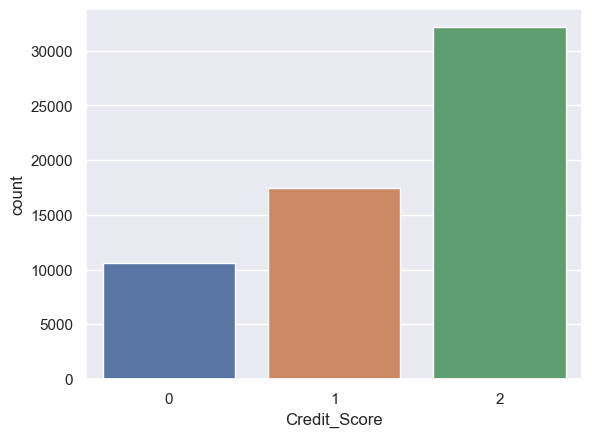

In [652]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x='Credit_Score', data=df)

In [653]:
df['Credit_Score'].value_counts()

2    32172
1    17461
0    10641
Name: Credit_Score, dtype: int64

In [654]:
print('Labels are mapped to following:\n',le_name_mapping)

Labels are mapped to following:
 {'Good': 0, 'Poor': 1, 'Standard': 2}


As shown in the plot, there is a class imbalanced. To tackle this, we will look at F1 score than the classification accuracy.

Another way this can be handled is by resampling methods. 

    1. under-sampling
    2. over-sampling

These techniques and their effects are explored in detail in model selection section in this notebook.

In [655]:
col_names = list(df.columns)
col_names
col_names[:-6]

['Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Credit_Score']

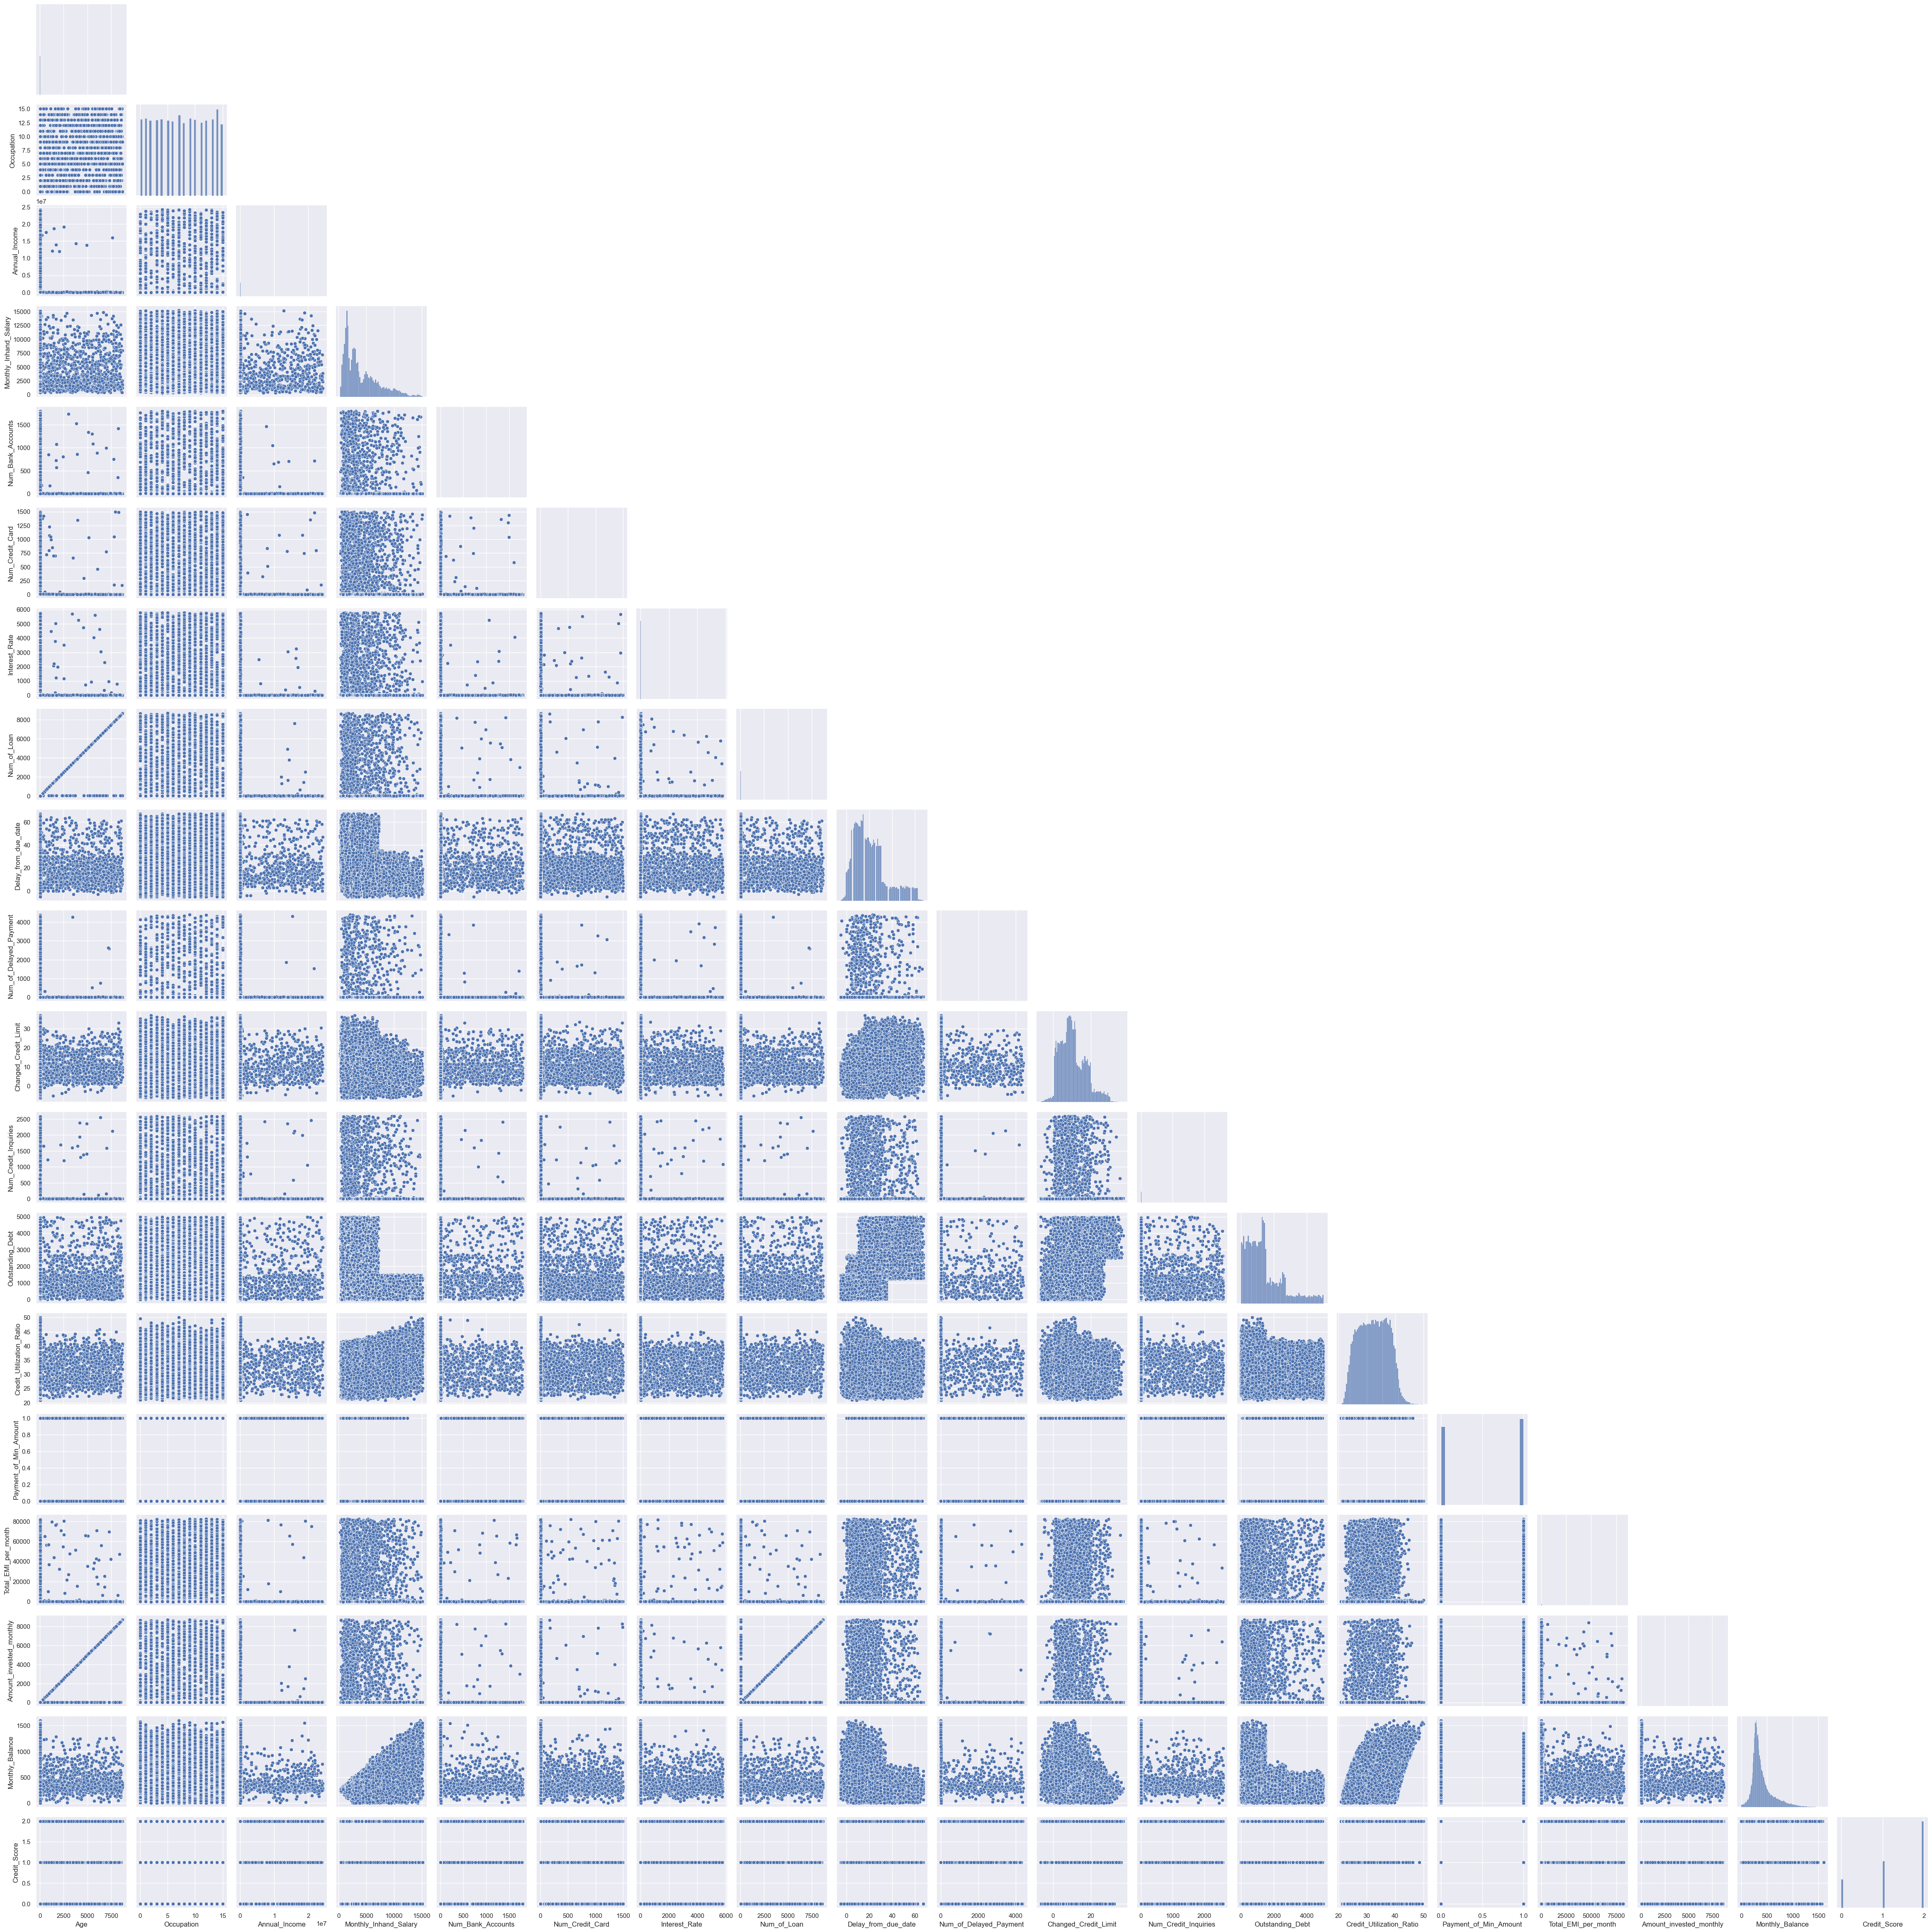

In [656]:
sns.pairplot(df[col_names[:-6]], corner=True)

Pair-plot shows a visual representation of relation between all the features in the data.

### Correlation
Checking correlation of Credit_Score with all other columns in data.

In [657]:
df.corrwith(df['Credit_Score'])

Age                                                  -0.001474
Occupation                                            0.012913
Annual_Income                                         0.005585
Monthly_Inhand_Salary                                -0.071885
Num_Bank_Accounts                                     0.002467
Num_Credit_Card                                      -0.003542
Interest_Rate                                        -0.004989
Num_of_Loan                                          -0.001295
Delay_from_due_date                                   0.095686
Num_of_Delayed_Payment                                0.004389
Changed_Credit_Limit                                  0.187748
Num_Credit_Inquiries                                  0.007825
Outstanding_Debt                                      0.035515
Credit_Utilization_Ratio                             -0.013989
Payment_of_Min_Amount                                 0.239015
Total_EMI_per_month                                  -0

Data does not show any strong positively correlating and negatively correlating variables with 'Credit_Score'

# Classification Models developement and Selection

Let's look at 3 different classifiers. Here, performance metrics is f1 score because it is a harmonic mean and and gives better results than accuracy (arithmetic mean), when data is imbalanced. This is just to select classifier for sampling methods. GridSearchCV is performed to select best hyper parameters.

    1. Random Forest
    
    2. Gradient Boost
    
    3. AdaBoost
    
Later, we'll look at 2 sampling methods to handle data imbalance with best performing classifier i.e best f1 score. (performance metrics - precision, recall and f1 score of each class)

    1.RandomUnderSampler
    
    2.RandomOverSampler

### Generating Datasets

In [91]:
X = df.drop('Credit_Score', axis=1)

In [92]:
y = df['Credit_Score']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

## 1. Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [184]:
rfc=RandomForestClassifier(random_state=1,class_weight='balanced')

In [156]:
param_grid = {'bootstrap': [True]
              ,'n_estimators': [10, 100, 200, 500,1000]}

In [185]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'n_estimators': [10, 100, 200, 500, 1000]})

In [277]:
CV_rfc.best_params_

{'bootstrap': True, 'n_estimators': 500}

In [ ]:
CV_rfc.fit(X_train, y_train)

In [249]:
print('Classification accuracy: ',CV_rfc.score(X_test,y_test))

Classification accuracy:  0.7664657413039871


In [252]:
y_hat=CV_rfc.predict(X_test)
print('Classification F1 score:' ,f1_score(y_test,y_hat, average='weighted'))

Classification F1 score: 0.7652862150458621


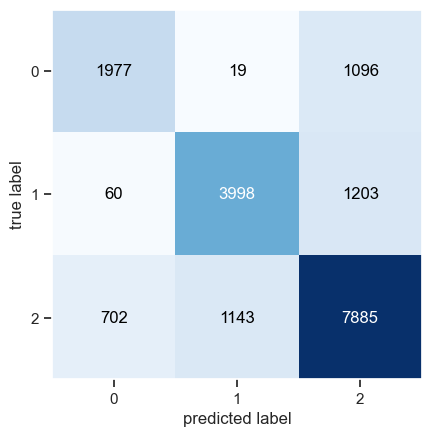

In [246]:
cm = confusion_matrix(y_test,y_hat, binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

In [565]:
 print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.72      0.64      0.68      3092
           1       0.77      0.76      0.77      5261
           2       0.77      0.81      0.79      9730

    accuracy                           0.77     18083
   macro avg       0.76      0.74      0.75     18083
weighted avg       0.77      0.77      0.77     18083




## 2. Gradient Boost

In [308]:
from sklearn.ensemble import GradientBoostingClassifier

In [326]:
param_grid_gbc = {'n_estimators': [10, 20, 30],
              'learning_rate': [1.0,0.1]}

In [327]:
gbc = GradientBoostingClassifier(random_state=1)

In [328]:
CV_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid_gbc, cv=5, n_jobs=-1)

In [329]:
CV_gbc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.1],
                         'n_estimators': [10, 20, 30]})

In [330]:
CV_gbc.best_params_

{'learning_rate': 1.0, 'n_estimators': 30}

In [331]:
print('Classification accuracy: ',CV_gbc.score(X_test,y_test))

Classification accuracy:  0.6935796051540121


In [332]:
y_hat_gbc = CV_gbc.predict(X_test)
print('Classification F1 score:' ,f1_score(y_test,y_hat_gbc, average='weighted'))

Classification F1 score: 0.690970273686039


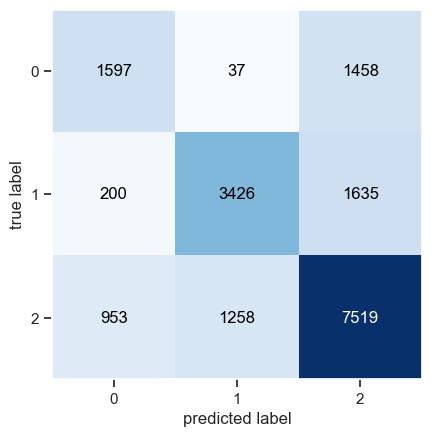

In [333]:
gbc_cm = confusion_matrix(y_test,y_hat_gbc, binary=False)
fig, ax = plot_confusion_matrix(conf_mat=gbc_cm)
plt.show()

In [334]:
 print(classification_report(y_test, y_hat_gb))

              precision    recall  f1-score   support

           0       0.58      0.52      0.55      3092
           1       0.73      0.64      0.68      5261
           2       0.70      0.77      0.74      9730

    accuracy                           0.69     18083
   macro avg       0.67      0.64      0.66     18083
weighted avg       0.69      0.69      0.69     18083



## 3. Adaboost

In [335]:
from sklearn.ensemble import AdaBoostClassifier

In [337]:
param_grid_abc = {'n_estimators': [10, 20, 30],
                  'learning_rate': [1.0,0.1]}

In [338]:
abc = AdaBoostClassifier(random_state=1)

In [344]:
CV_abc = GridSearchCV(estimator=abc, param_grid=param_grid_abc, cv=5, n_jobs=-1)

In [345]:
CV_abc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': [1.0, 0.1],
                         'n_estimators': [10, 20, 30]})

In [346]:
CV_abc.best_params_

{'learning_rate': 1.0, 'n_estimators': 30}

In [347]:
print('Classification accuracy: ',CV_abc.score(X_test,y_test))

Classification accuracy:  0.648122546037715


In [349]:
y_hat_abc = CV_abc.predict(X_test)
print('Classification F1 score:' ,f1_score(y_test,y_hat_abc, average='weighted'))

Classification F1 score: 0.6411876505224582


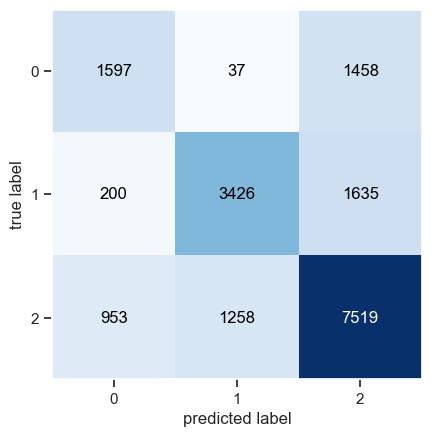

In [350]:
abc_cm = confusion_matrix(y_test,y_hat_gbc, binary=False)
fig, ax = plot_confusion_matrix(conf_mat=abc_cm)
plt.show()

In [353]:
 print(classification_report(y_test, y_hat_abc))

              precision    recall  f1-score   support

           0       0.57      0.43      0.49      3092
           1       0.66      0.56      0.60      5261
           2       0.66      0.77      0.71      9730

    accuracy                           0.65     18083
   macro avg       0.63      0.58      0.60     18083
weighted avg       0.64      0.65      0.64     18083



# Over-sampling and under-sampling with Random Forest Classifier

#### This section is to see the effect of over and under sampling on the accuracy of the classifier

After sampling classes will be balanced.

As a performance metrics, we will look at precision, recall and f1 score for individual classes

### Under-sampling

In [529]:
print(Counter(y_train))
undersample = RandomUnderSampler(sampling_strategy= 'not minority')
X_under, y_under = undersample.fit_resample(X_train, y_train)

Counter({2: 22442, 1: 12200, 0: 7549})


Summarize class distribution

In [530]:
print(Counter(y_under))

Counter({0: 7549, 1: 7549, 2: 7549})


In [531]:
param_grid = {'bootstrap': [True]
              ,'n_estimators': [10, 100, 200, 500,1000]}
CV_rfc_under = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)

In [532]:
CV_rfc_under.fit(X_under, y_under)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'n_estimators': [10, 100, 200, 500, 1000]})

In [533]:
y_under_pred = CV_rfc_under.predict(X_test)

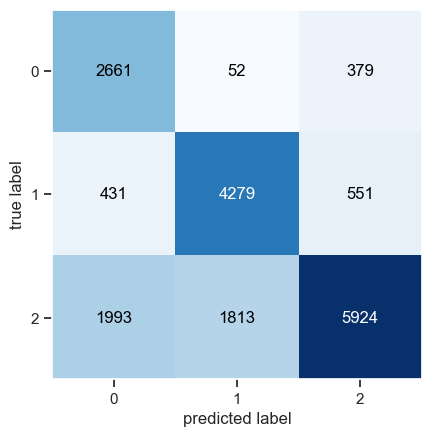

In [534]:
cm_under = confusion_matrix(y_test,y_under_pred, binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm_under)
plt.show()

In [535]:
print(classification_report(y_test, y_under_pred))

              precision    recall  f1-score   support

           0       0.52      0.86      0.65      3092
           1       0.70      0.81      0.75      5261
           2       0.86      0.61      0.71      9730

    accuracy                           0.71     18083
   macro avg       0.69      0.76      0.71     18083
weighted avg       0.76      0.71      0.71     18083



### Over-sampling

In [536]:
print(Counter(y_train))
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X_train, y_train)

Counter({2: 22442, 1: 12200, 0: 7549})


Summarize class distribution

In [537]:
print(Counter(y_over))

Counter({2: 22442, 0: 22442, 1: 22442})


In [539]:
param_grid = {'bootstrap': [True]
              ,'n_estimators': [10, 100, 200, 500,1000]}
CV_rfc_over = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1)

In [540]:
CV_rfc_over.fit(X_over, y_over)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'n_estimators': [10, 100, 200, 500, 1000]})

In [541]:
CV_rfc_over.score(X_test, y_test)

0.7739866172648344

In [542]:
y_over_pred = CV_rfc_over.predict(X_test)

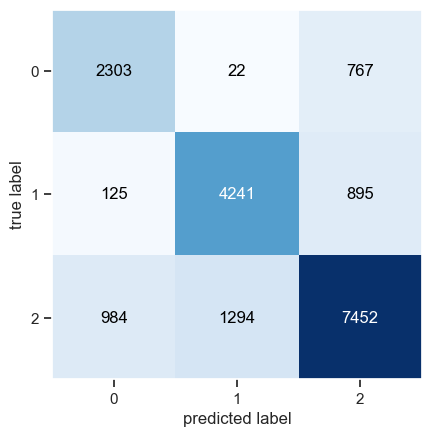

In [543]:
cm_over = confusion_matrix(y_test,y_over_pred, binary=False)
fig, ax = plot_confusion_matrix(conf_mat=cm_over)
plt.show()

In [544]:
print(classification_report(y_test, y_over_pred))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71      3092
           1       0.76      0.81      0.78      5261
           2       0.82      0.77      0.79      9730

    accuracy                           0.77     18083
   macro avg       0.75      0.77      0.76     18083
weighted avg       0.78      0.77      0.77     18083



# Model Selection Conclusion

#### Random Forest gives better perfomance with over-sampling. Random forest classifier will be used in testing.

Random forest with over-sampling has highest recall and f1 score of each class as compared to all others. Although precision for class 0 is lower than without over-sampling. Although both have same accuracy, random forest with over-sampling understands classes better.

In [569]:
 print('Random forest classifier without over-sampling:\n\n',classification_report(y_test, y_hat))

Random forest classifier without over-sampling:

               precision    recall  f1-score   support

           0       0.72      0.64      0.68      3092
           1       0.77      0.76      0.77      5261
           2       0.77      0.81      0.79      9730

    accuracy                           0.77     18083
   macro avg       0.76      0.74      0.75     18083
weighted avg       0.77      0.77      0.77     18083



In [570]:
print('Random forest classifier with over-sampling:\n\n',classification_report(y_test, y_over_pred))

Random forest classifier with over-sampling:

               precision    recall  f1-score   support

           0       0.67      0.74      0.71      3092
           1       0.76      0.81      0.78      5261
           2       0.82      0.77      0.79      9730

    accuracy                           0.77     18083
   macro avg       0.75      0.77      0.76     18083
weighted avg       0.78      0.77      0.77     18083



# Testing -  test.csv data

In [572]:
df_test = pd.read_csv('./test.csv')

#### Pre-processing  data exactly same as training data.

In [573]:
df_test.drop(['ID','Customer_ID','Name','SSN','Month'], axis=1, inplace=True)
df_test.head()
df_test.isna().sum()
df_test.drop('Type_of_Loan', axis=1, inplace=True)
df_test.dropna(inplace=True)
df_test.isnull().sum()
df_test.head()


df_test['Age'].isna().sum()
df_test['Age'] = df_test['Age'].apply(lambda x: x[0:len(x)-1] if x[-1]=='_' else x)

df_test['Annual_Income'].apply(lambda x: x[0:len(x)-1] if x[-1]=='_' else x)
df_test['Annual_Income'] = df_test['Annual_Income'].apply(lambda x: x[0:len(x)-1] if x[-1]=='_' else x)

df_test['Occupation'].value_counts()
df_test['Occupation'] = df_test['Occupation'].replace(['_______'], 'Unknown')
df_test['Occupation'].value_counts()

print('Negative values in the Age column: ',sum(df_test.Age.astype(int)<0))
df_test['Age'] = df_test['Age'].astype(int)
df_test['Age'] = df_test[df_test['Age']>0]

print('Negative values in the Age column: ',sum(df_test.Age<0))

df_test['Num_of_Loan'] = df_test['Num_of_Loan'].apply(lambda x: x[0:len(x)-1] if x[-1]=='_' else x)
df_test['Num_of_Loan'] = df_test['Num_of_Loan'].astype(int)
df_test['Num_of_Loan'] = df_test[df_test['Num_of_Loan']>=0]


df_test['Num_of_Delayed_Payment'] = df_test['Num_of_Delayed_Payment'].apply(lambda x: x[0:len(x)-1] if x[-1]=='_' else x)
df_test['Outstanding_Debt'] = df_test['Outstanding_Debt'].apply(lambda x: x[0:len(x)-1] if x[-1]=='_' else x)

df_test['Credit_History_Age']
df_test.drop('Credit_History_Age', axis=1, inplace=True)

sum(df_test['Amount_invested_monthly']=='__10000__')
df_test['Amount_invested_monthly'] = df_test[df_test['Amount_invested_monthly']!='__10000__']
sum(df_test['Amount_invested_monthly']=='__10000__')


sum(df_test['Payment_Behaviour']=='!@9#%8')
df_test.drop(df_test[df_test['Payment_Behaviour'] =='!@9#%8'].index, inplace = True)
sum(df_test['Payment_Behaviour']=='!@9#%8')

sum(df_test['Payment_of_Min_Amount']=='NM')
df_test['Payment_of_Min_Amount'] = df_test['Payment_of_Min_Amount'].replace(['NM'], 'No')
sum(df_test['Payment_of_Min_Amount']=='NM')


df_test.drop(df_test[df_test['Changed_Credit_Limit'] =='_'].index, inplace = True)
df_test.drop(df_test[df_test['Monthly_Balance'] =='__-333333333333333333333333333__'].index, inplace = True)

sum(df_test['Credit_Mix']=='_')
df_test.drop('Credit_Mix', axis=1, inplace=True)

Negative values in the Age column:  317
Negative values in the Age column:  0


#### Label and One-hot Encoding

In [574]:
le_occupation = preprocessing.LabelEncoder()
le_payment_of_min_amount = preprocessing.LabelEncoder()

df_test['Occupation'] = le_occupation.fit_transform(df_test['Occupation'])
df_test['Payment_of_Min_Amount'] = le_payment_of_min_amount.fit_transform(df_test['Payment_of_Min_Amount'])

le_occupation_name_mapping = dict(zip(le_occupation.classes_, le_occupation.transform(le_occupation.classes_)))
print('Occupation encodings:\n',le_occupation_name_mapping)

le_payment_of_min_amount_name_mapping = dict(zip(le_payment_of_min_amount.classes_, le_payment_of_min_amount.transform(le_payment_of_min_amount.classes_)))
print('Payment of minimum amount encodings:\n',le_payment_of_min_amount_name_mapping)

df_test.isna().sum()
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Num_of_Loan'] = df_test['Num_of_Loan'].fillna(df_test['Num_of_Loan'].median())
df_test['Payment_of_Min_Amount'] = df_test['Payment_of_Min_Amount'].fillna(df_test['Payment_of_Min_Amount'].median())
df_test['Amount_invested_monthly'] = df_test['Amount_invested_monthly'].fillna(df_test['Amount_invested_monthly'].median())


df_test.info()

df_test[['Annual_Income',
    'Num_of_Delayed_Payment',
    'Num_of_Delayed_Payment',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Monthly_Balance']]=df_test[['Annual_Income',
                            'Num_of_Delayed_Payment',
                            'Num_of_Delayed_Payment',
                            'Changed_Credit_Limit',
                            'Outstanding_Debt',
                            'Monthly_Balance']].astype(float)
                            

df_test = pd.get_dummies(df_test, columns=['Payment_Behaviour'])

Occupation encodings:
 {'Accountant': 0, 'Architect': 1, 'Developer': 2, 'Doctor': 3, 'Engineer': 4, 'Entrepreneur': 5, 'Journalist': 6, 'Lawyer': 7, 'Manager': 8, 'Mechanic': 9, 'Media_Manager': 10, 'Musician': 11, 'Scientist': 12, 'Teacher': 13, 'Unknown': 14, 'Writer': 15}
Payment of minimum amount encodings:
 {'No': 0, 'Yes': 1}
<class 'pandas.core.frame.DataFrame'>
Int64Index: 30094 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       30094 non-null  float64
 1   Occupation                30094 non-null  int32  
 2   Annual_Income             30094 non-null  object 
 3   Monthly_Inhand_Salary     30094 non-null  float64
 4   Num_Bank_Accounts         30094 non-null  int64  
 5   Num_Credit_Card           30094 non-null  int64  
 6   Interest_Rate             30094 non-null  int64  
 7   Num_of_Loan               30094 non-null  float64
 8   D

In [575]:
y_pred = CV_rfc_over.predict(df_test)

In [576]:
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [577]:
y_pred_transformed = le.inverse_transform(y_pred)

In [578]:
df_test['Credit_Score_Pred'] = y_pred_transformed

In [579]:
df_test

Age  Occupation  Annual_Income  Monthly_Inhand_Salary  \
0      23.0          12       19114.12            1824.843333   
1      24.0          12       19114.12            1824.843333   
4      28.0          14       34847.84            3037.986667   
5      28.0          13       34847.84            3037.986667   
9      35.0           4      143162.64           12187.220000   
...     ...         ...            ...                    ...   
49992  29.0           1       20002.88            1929.906667   
49993  29.0           1       20002.88            1929.906667   
49994  29.0          14       20002.88            1929.906667   
49997  25.0           9       39628.99            3359.415833   
49999  25.0           9       39628.99            3359.415833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0                      3                4              3         23.0   
1                      3                4              3         24.0   
4                      2                4              6         28.0   
5                      2                4              6         28.0   
9                      1                5              8         35.0   
...                  ...              ...            ...          ...   
49992                 10                8             29         29.0   
49993                 10                8             29         29.0   
49994                 10                8             29         29.0   
49997                  4                6              7         25.0   
49999                  4                6              7         25.0   

       Delay_from_due_date  Num_of_Delayed_Payment  ...  Total_EMI_per_month  \
0                        3                     7.0  ...            49.574949   
1                        3                     9.0  ...            49.574949   
4                        3                     1.0  ...            18.816215   
5                        3                     3.0  ...            18.816215   
9                        6                     3.0  ...           246.992319   
...                    ...                     ...  ...                  ...   
49992                   33                    25.0  ...            60.964772   
49993                   33                    25.0  ...            60.964772   
49994                   33                    22.0  ...            60.964772   
49997                   23                     5.0  ...            35.104023   
49999                   22                     5.0  ...            35.104023   

       Amount_invested_monthly  Monthly_Balance  \
0                         23.0       186.266702   
1                         24.0       361.444004   
4                         28.0       485.298434   
5                         28.0       303.355083   
9                         35.0       788.114550   
...                        ...              ...   
49992                     29.0       314.815153   
49993                     29.0       350.231473   
49994                     29.0       341.179047   
49997                     34.0       349.726332   
49999                     25.0       360.379683   

       Payment_Behaviour_High_spent_Large_value_payments  \
0                                                      0   
1                                                      0   
4                                                      1   
5                                                      0   
9                                                      0   
...                                                  ...   
49992                                                  0   
49993                                                  0   
49994                                                  0   
49997                                                  0   
49999                                                  0   

       Payment_Behaviour_High_spent_Medium_value_paymen


##### Loading original test.csv file to get customer level data, such as 'ID', 'Customer_ID'.

In [580]:
df_test_org = pd.read_csv('./test.csv')

In [581]:
df_result = pd.merge(df_test, df_test_org, left_index=True, right_index=True)


##### Some column names are changes due to a merger

In [582]:
df_result.columns

Index(['Age_x', 'Occupation_x', 'Annual_Income_x', 'Monthly_Inhand_Salary_x',
       'Num_Bank_Accounts_x', 'Num_Credit_Card_x', 'Interest_Rate_x',
       'Num_of_Loan_x', 'Delay_from_due_date_x', 'Num_of_Delayed_Payment_x',
       'Changed_Credit_Limit_x', 'Num_Credit_Inquiries_x',
       'Outstanding_Debt_x', 'Credit_Utilization_Ratio_x',
       'Payment_of_Min_Amount_x', 'Total_EMI_per_month_x',
       'Amount_invested_monthly_x', 'Monthly_Balance_x',
       'Payment_Behaviour_High_spent_Large_value_payments',
       'Payment_Behaviour_High_spent_Medium_value_payments',
       'Payment_Behaviour_High_spent_Small_value_payments',
       'Payment_Behaviour_Low_spent_Large_value_payments',
       'Payment_Behaviour_Low_spent_Medium_value_payments',
       'Payment_Behaviour_Low_spent_Small_value_payments', 'Credit_Score_Pred',
       'ID', 'Customer_ID', 'Month', 'Name', 'Age_y', 'SSN', 'Occupation_y',
       'Annual_Income_y', 'Monthly_Inhand_Salary_y', 'Num_Bank_Accounts_y',
       '

# Results

In [676]:
df_result[['ID','Customer_ID','Name','Credit_Score_Pred']].head(51)

ID Customer_ID              Name Credit_Score_Pred
0   0x160a   CUS_0xd40     Aaron Maashoh              Good
1   0x160b   CUS_0xd40     Aaron Maashoh              Good
4   0x1616  CUS_0x21b1   Rick Rothackerj              Good
5   0x1617  CUS_0x21b1   Rick Rothackerj              Good
9   0x1623  CUS_0x2dbc            Langep              Good
10  0x1624  CUS_0x2dbc               NaN              Good
12  0x162e  CUS_0xb891            Jasond          Standard
13  0x162f  CUS_0xb891            Jasond          Standard
14  0x1630  CUS_0xb891            Jasond          Standard
15  0x1631  CUS_0xb891            Jasond          Standard
16  0x163a  CUS_0x1cdb            Deepaa          Standard
17  0x163b  CUS_0x1cdb            Deepaa          Standard
19  0x163d  CUS_0x1cdb            Deepaa          Standard
20  0x1646  CUS_0x95ee                Np          Standard
23  0x1649  CUS_0x95ee                Np              Good
25  0x1653  CUS_0x284a            Nadiaq              Good
26  0x1654  CUS_0x284a            Nadiaq              Good
28  0x165e  CUS_0x5407              Annk              Poor
30  0x1660  CUS_0x5407               NaN              Poor
31  0x1661  CUS_0x5407              Annk              Poor
32  0x166a  CUS_0x4157      Charlie Zhur          Standard
37  0x1677  CUS_0xba08            Jamesj              Good
38  0x1678  CUS_0xba08               NaN              Good
40  0x1682  CUS_0xa66b           Saphirj          Standard
42  0x1684  CUS_0xa66b           Saphirj          Standard
45  0x168f  CUS_0xc0ab          Soyoungd          Standard
48  0x169a  CUS_0x3e45   Harriet McLeodd          Standard
49  0x169b  CUS_0x3e45   Harriet McLeodd          Standard
53  0x16a7  CUS_0x6c66     Sinead Carews              Poor
57  0x16b3   CUS_0xff4         Poornimaf          Standard
58  0x16b4   CUS_0xff4         Poornimaf          Standard
59  0x16b5   CUS_0xff4         Poornimaf          Standard
60  0x16be  CUS_0x33d2         Chalmersa          Standard
62  0x16c0  CUS_0x33d2         Chalmersa          Standard
63  0x16c1  CUS_0x33d2         Chalmersa          Standard
64  0x16ca  CUS_0x6070               NaN          Standard
67  0x16cd  CUS_0x6070             Parkm          Standard
68  0x16d6   CUS_0xfdb          Patrickg          Standard
70  0x16d8   CUS_0xfdb          Patrickg          Standard
73  0x16e3  CUS_0x3553   Laurence Frosty          Standard
74  0x16e4  CUS_0x3553   Laurence Frosty          Standard
76  0x16ee  CUS_0x4100             Reema              Poor
78  0x16f0  CUS_0x4100             Reema              Poor
81  0x16fb  CUS_0x132f               NaN          Standard
82  0x16fc  CUS_0x132f  Mark Felsenthald          Standard
83  0x16fd  CUS_0x132f  Mark Felsenthald          Standard
85  0x1707  CUS_0xa16e        Lee Chyenz              Poor
86  0x1708  CUS_0xa16e        Lee Chyenz              Poor
87  0x1709  CUS_0xa16e        Lee Chyenz              Poor
88  0x1712  CUS_0xac86             Nickb              Good
89  0x1713  CUS_0xac86             Nickb              Good

#### Customers whos credit rating is predictd to be poor.

In [715]:
df_result[['ID','Customer_ID','Name','Credit_Score_Pred']]

ID Customer_ID             Name Credit_Score_Pred
0       0x160a   CUS_0xd40    Aaron Maashoh              Good
1       0x160b   CUS_0xd40    Aaron Maashoh              Good
4       0x1616  CUS_0x21b1  Rick Rothackerj              Good
5       0x1617  CUS_0x21b1  Rick Rothackerj              Good
9       0x1623  CUS_0x2dbc           Langep              Good
...        ...         ...              ...               ...
49992  0x25fe2  CUS_0x8600   Sarah McBridec              Poor
49993  0x25fe3  CUS_0x8600   Sarah McBridec              Poor
49994  0x25fe4  CUS_0x8600   Sarah McBridec              Poor
49997  0x25fef  CUS_0x942c            Nicks              Poor
49999  0x25ff1  CUS_0x942c            Nicks              Poor

[30094 rows x 4 columns]

In [713]:
df_result[['ID','Customer_ID','Name','Monthly_Inhand_Salary_y','Credit_Score_Pred']].loc[df_result['Credit_Score_Pred']=='Poor']

ID Customer_ID            Name  Monthly_Inhand_Salary_y  \
28      0x165e  CUS_0x5407            Annk              2611.115000   
30      0x1660  CUS_0x5407             NaN              2611.115000   
31      0x1661  CUS_0x5407            Annk              2611.115000   
53      0x16a7  CUS_0x6c66   Sinead Carews               519.128750   
76      0x16ee  CUS_0x4100           Reema              1512.361667   
...        ...         ...             ...                      ...   
49992  0x25fe2  CUS_0x8600  Sarah McBridec              1929.906667   
49993  0x25fe3  CUS_0x8600  Sarah McBridec              1929.906667   
49994  0x25fe4  CUS_0x8600  Sarah McBridec              1929.906667   
49997  0x25fef  CUS_0x942c           Nicks              3359.415833   
49999  0x25ff1  CUS_0x942c           Nicks              3359.415833   

      Credit_Score_Pred  
28                 Poor  
30                 Poor  
31                 Poor  
53                 Poor  
76                 Poor  
...                 ...  
49992              Poor  
49993              Poor  
49994              Poor  
49997              Poor  
49999              Poor  

[9385 rows x 5 columns]

## Above are the indentified customers with poor credit scores, to prevent risky lending.

####  Results show customer level data using customerID. I have suggested a different approach to see these results for a bussiness implementation in the next section.

There are some NaN values of in the 'Name' column. This is not a problem because we have 'Customer_ID' data without any null values and 'Name' and 'Customer_ID' have 1-to-1 relation. Names can be retrived from Customer_ID data.

In [587]:
df_result[['ID','Customer_ID','Name','Credit_Score_Pred']].isna().sum()

ID                      0
Customer_ID             0
Name                 3046
Credit_Score_Pred       0
dtype: int64

# Business Impact and Recommendations


#### Important indicators (features) to the target variable are identified below.

In [740]:
a = list(df.columns)
a.remove('Credit_Score')
print('Important indicators/features to the target variables are:\n')
a

Important indicators/features to the target variables are:



['Age',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Monthly_Balance',
 'Payment_Behaviour_High_spent_Large_value_payments',
 'Payment_Behaviour_High_spent_Medium_value_payments',
 'Payment_Behaviour_High_spent_Small_value_payments',
 'Payment_Behaviour_Low_spent_Large_value_payments',
 'Payment_Behaviour_Low_spent_Medium_value_payments',
 'Payment_Behaviour_Low_spent_Small_value_payments']

#### Clear actionable recommendations with supporting evidence.

Below idea is to find Customer_ID which are predicted to have only poor Credit_Score in all the instances in data.

For example, 

    Scenrio 1: if Customer_ID 123 appered 3 times in the data set and all the 3 times the predicted credit score is poor then it is definately a risky lending.
    
    Scenario 2: if Customer_ID 123 appered 3 times in the data set and all the 1 or 2 times the predicted credit score is poor and 2 or 1 times standard then it may not be a risky lending. Then further investigation can be done from the lender.
    
    Scenario 3: if Customer_ID 123 appered 3 times in the data set and all the 1 or 2 times the predicted credit score is poor and 2 or 1 times Good then it may not be a risky lending. Then further investigation can be done from the lender. then it is definately a risky lending. 
    In case of 1 Poor and 2 Good credit rating, there is a very high hance that it is not a risky lending.

To get this data, left join Good and Standard credit score datraframes to Poor credit score data frames as given below.
These data frames count the occurances of credit scores, i.e how many times a customer predicted to have that perticular credit rating.

#### When both Good and Standard column gives null values. Then it is definately a risky lending.

In [756]:
Poor_score = df_result[df_result['Credit_Score_Pred']=='Poor'].groupby("Customer_ID")["Credit_Score_Pred"].count()

In [765]:
Standard_score = df_result[df_result['Credit_Score_Pred']=='Standard'].groupby("Customer_ID")["Credit_Score_Pred"].count()

In [754]:
Good_score = df_result[df_result['Credit_Score_Pred']=='Good'].groupby("Customer_ID")["Credit_Score_Pred"].count()

In [841]:
scores =Poor_score.to_frame().merge(Standard_score.to_frame().merge(Good_score,on='Customer_ID',how='left'),on='Customer_ID',how='left')

In [842]:
scores.set_axis(['Poor','Standard','Good'], axis=1, inplace=True)

In [843]:
scores

Poor  Standard  Good
Customer_ID                      
CUS_0x1000      4       NaN   NaN
CUS_0x1018      3       1.0   NaN
CUS_0x1048      3       NaN   NaN
CUS_0x1056      4       NaN   NaN
CUS_0x1075      2       1.0   NaN
...           ...       ...   ...
CUS_0xf9f       1       NaN   NaN
CUS_0xfa4       2       NaN   NaN
CUS_0xfae       2       NaN   NaN
CUS_0xfc9       3       NaN   NaN
CUS_0xffc       3       NaN   NaN

[4171 rows x 3 columns]

In [849]:
scores_poor_and_standard = scores[scores['Good'].isna()]

Customers with no Good score occurance but might have standard score occurance

In [846]:
scores_poor_and_standard

Poor  Standard  Good
Customer_ID                      
CUS_0x1000      4       NaN   NaN
CUS_0x1018      3       1.0   NaN
CUS_0x1048      3       NaN   NaN
CUS_0x1056      4       NaN   NaN
CUS_0x1075      2       1.0   NaN
...           ...       ...   ...
CUS_0xf9f       1       NaN   NaN
CUS_0xfa4       2       NaN   NaN
CUS_0xfae       2       NaN   NaN
CUS_0xfc9       3       NaN   NaN
CUS_0xffc       3       NaN   NaN

[4147 rows x 3 columns]

In [ ]:
scores_only_poor = scores_poor_and_standard[scores_poor_and_standard['Standard'].isna()]

#### These customers have only Poor credit score occurance. Definately a risky lending

In [852]:
scores_only_poor

Poor  Standard  Good
Customer_ID                      
CUS_0x1000      4       NaN   NaN
CUS_0x1048      3       NaN   NaN
CUS_0x1056      4       NaN   NaN
CUS_0x107c      3       NaN   NaN
CUS_0x1098      3       NaN   NaN
...           ...       ...   ...
CUS_0xf9f       1       NaN   NaN
CUS_0xfa4       2       NaN   NaN
CUS_0xfae       2       NaN   NaN
CUS_0xfc9       3       NaN   NaN
CUS_0xffc       3       NaN   NaN

[3514 rows x 3 columns]